from http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

generate a test set of data -- just a straight line with some Gaussian noise

In [2]:
xmin, xmax = -5, 5
n_samples = 10
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

In [3]:
X

array([ 7.09942246,  2.03691089,  4.14326325,  9.0000753 ,  7.60339093,
       -0.87717558,  4.24857739, -0.21290469, -0.00929854,  1.38616529])

In [4]:
y

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1.])

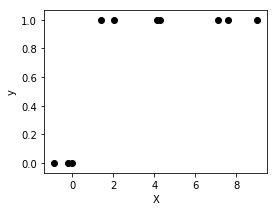

In [5]:
plt.figure(1, figsize=(4, 3))
_=plt.scatter(X.ravel(), y, color='black', zorder=20) # zorder determines the layer priority
_=plt.ylabel('y')
_=plt.xlabel('X')

In [6]:
X = X[:, np.newaxis] # reshape X to fit the needs of sklearn

In [7]:
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

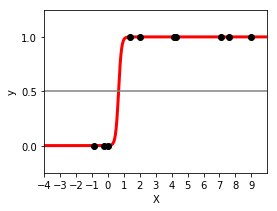

In [8]:
# plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20) 

X_test = np.linspace(-5, 10, 300)

def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

#ols = linear_model.LinearRegression()
#ols.fit(X, y)
#plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5') # rather than the normal y=0 axis 

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
#plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
#           loc="lower right", fontsize='small')
plt.show()